# SJSU CMPE 180A Data Structures and Algorithms in Python

**Term Project** (20 points)

** Project Name:  your_dataset_name Analytics**

Team Name:  Jet Setters (example)

Group Number: 8

Group members with SJSU IDs:


1.   Bradley Yong, 008383440
2.   Jonathan Spikes, SJSU_ID 2
3.   Lisa Leib, 018264155


Date:  August 29, 2024

Selected data set:  [US Airline Flight Routes and Fares](https://www.kaggle.com/code/nitikagupta29/us-airline-flight-routes-and-fares)









## Dataset analysis and visualisation

The goal of dataset analysis is to explain what dataset represents and to illustrate the most interesting and relevant features i.e. columns present in dataset.

Possible steps:
1. Load dataset
2. Inspect data and preprocess columns if needed
3. Visualize data (histogram, scatterplot,...)
4. Analyze dataset by plotting or presenting overview of different classes/groups/features
5. Present your results: prepare slides and an  5 to 10-minute presentation in Week 11 of the course


# 1. Load dataset

## Environment Preparation

In [1]:
# enable mounting of google drive
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [2]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import sys
import seaborn as sns

## Load Data files

In [4]:
# US Airline Flight Routes and Fares
# https://www.kaggle.com/code/nitikagupta29/us-airline-flight-routes-and-fares

#  filename = "/content/drive/MyDrive/data/US Airline Flight Routes and Fares 1993-2024.csv"
filename = 'US_Airline_Flight_Routes_and_Fares_1993-2024.csv'

# df = pd.read_csv(filename)
df = pd.read_csv(filename, low_memory=False)

df.head()



,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [5]:
# Data enrichment files

# Lookup data for Airline names and two digit codes
airlinecodes = '/content/drive/MyDrive/data/AirlineCodes.csv'
df_airline_codes = pd.read_csv(airlinecodes)
# df_airline_codes.head()

# Lookup data for Airport geolocation (Latitude/Longitude)
geolocations = '/content/drive/MyDrive/data/Geocodes.csv'
df_geolocations = pd.read_csv(geolocations)
# df_geolocations.head()
print('Enrichment data loaded')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data/AirlineCodes.csv'

# 2. Inspect data and preprocess columns if needed

## 2.1 Data Inspection

Data issues:
```
  1) Resolve warning --> DtypeWarning: Columns (20,21) have mixed types
      * Geocoded_City1
      * Geocoded_City2
  2) Delete extraneous data:
      * column: tbl
      * column: tbl1apk
  3) Missing data from columns: NO ACTION YET
      * large_ms
      * fare_lg
      * lf_ms
      * fare_low
      * carrier_lg
      * carrier_low
  4) Additional Missing data:  NO ACTION YET
      * No data for 1995
      * Partial data for 2024
  5) Evaluate object data types:  NO ACTION YET
      * city1
      * city2
      * airport_1
      * airport_2
      * carrier_lg
      * carrier_low
  6) Awareness of rows with incomplete/inaccurate data?
      * Passengers = 0  | 7,439 rows
      * Airline = YY  | 12 rows
      * Market Share (large + low) > 1
```

In [6]:
#

print('Shape: ', df.shape)
print('-----')
df.info()
# df.columns


Shape:  (245955, 23)
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-nu

In [7]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


Original Missing values

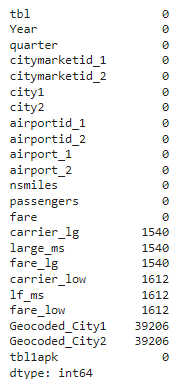

In [8]:
#
missing_values = df.isnull().sum()
print(missing_values)


tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64


## 2.2 Data Cleansing

In [9]:
#  Cleaning the data -- Standardizing column names

df.rename(columns={'large_ms': 'carrier_lg_ms'}, inplace=True)
df.rename(columns={'fare_lg': 'carrier_lg_fare'}, inplace=True)
df.rename(columns={'lf_ms': 'carrier_low_ms'}, inplace=True)
df.rename(columns={'fare_low': 'carrier_low_fare'}, inplace=True)
df.rename(columns={'lf_ms': 'carrier_low_ms'}, inplace=True)
df.rename(columns={'fare_low': 'carrier_low_fare'}, inplace=True)
df.rename(columns={'fare': 'avg_fare'}, inplace=True)

# df.info()
# print(df.shape)

In [10]:
#  Cleaning the data -- Deleting unneccessary columns

# Drop columns with any missing values
# df_cleaned_columns = df.dropna(axis=1)  #  deletes any column that contain any missing values (NaN) from the DataFrame -->  I don't like this approach
# Best to delete specific columns
del df['tbl1apk']
del df['tbl']
del df['Geocoded_City1']
del df['Geocoded_City2']

df.info()
# print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              245955 non-null  int64  
 1   quarter           245955 non-null  int64  
 2   citymarketid_1    245955 non-null  int64  
 3   citymarketid_2    245955 non-null  int64  
 4   city1             245955 non-null  object 
 5   city2             245955 non-null  object 
 6   airportid_1       245955 non-null  int64  
 7   airportid_2       245955 non-null  int64  
 8   airport_1         245955 non-null  object 
 9   airport_2         245955 non-null  object 
 10  nsmiles           245955 non-null  int64  
 11  passengers        245955 non-null  int64  
 12  avg_fare          245955 non-null  float64
 13  carrier_lg        244415 non-null  object 
 14  carrier_lg_ms     244415 non-null  float64
 15  carrier_lg_fare   244415 non-null  float64
 16  carrier_low       24

In [11]:
#  Cleaning the data -- Enriching the data with additional Carrier name info
#
# Adding Decode names for Airlines Name by merging with df_airline_codes
df_airline_codes.rename(columns={'Code': 'carrier_lg'}, inplace=True)
df_airline_codes.rename(columns={'Decode': 'carrier_lg_name'}, inplace=True)
df = pd.merge(df, df_airline_codes, on='carrier_lg', how='left')
df_airline_codes.rename(columns={'carrier_lg': 'carrier_low'}, inplace=True)
df_airline_codes.rename(columns={'carrier_lg_name': 'carrier_low_name'}, inplace=True)
df = pd.merge(df, df_airline_codes, on='carrier_low', how='left')

# print(df.info())

NameError: name 'df_airline_codes' is not defined

In [12]:
#  Cleaning the data -- Updating the format and values for Geolocation columns

# Adding Geocode locations by merging with df_geolocations
df_geolocations.rename(columns={'airport': 'airport_1'}, inplace=True)
df_geolocations.rename(columns={'Geolocation': 'geolocation_1'}, inplace=True)
df = pd.merge(df, df_geolocations, on='airport_1', how='left')

df_geolocations.rename(columns={'airport_1': 'airport_2'}, inplace=True)
df_geolocations.rename(columns={'geolocation_1': 'geolocation_2'}, inplace=True)
df = pd.merge(df, df_geolocations, on='airport_2', how='left')

# df.info()
# print(df.shape)

NameError: name 'df_geolocations' is not defined

In [13]:
#  Cleaning the data -- Reordering the columns in the dataframe
#
new_order = ['Year',
             'quarter',
             'citymarketid_1',
             'citymarketid_2',
             'city1',
             'city2',
             'airportid_1',
             'airportid_2',
             'airport_1',
             'airport_2',
             'nsmiles',
             'passengers',
             'avg_fare',
             'carrier_lg',
             'carrier_lg_name',
             'carrier_lg_ms',
             'carrier_lg_fare',
             'carrier_low',
             'carrier_low_name',
             'carrier_low_ms',
             'carrier_low_fare',
             'geolocation_1',
             'geolocation_2'
             ]

df = df.reindex(columns=new_order)

# print(df.info())

In [14]:
df.describe()


,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,avg_fare,carrier_lg_name,carrier_lg_ms,carrier_lg_fare,carrier_low_name,carrier_low_ms,carrier_low_fare,geolocation_1,geolocation_2
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,0.0,244415.000000,244415.000000,0.0,244343.000000,244343.000000,0.0,0.0
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,NaN,0.665252,218.710963,NaN,0.450438,190.675939,NaN,NaN
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,NaN,0.224635,84.674363,NaN,0.332669,73.577694,NaN,NaN
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,NaN,0.003800,50.000000,NaN,0.010000,50.000000,NaN,NaN
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,NaN,0.480000,161.500000,NaN,0.158000,140.060000,NaN,NaN
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,NaN,0.652400,208.030000,NaN,0.360000,181.630000,NaN,NaN
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,NaN,0.871900,263.640000,NaN,0.750000,230.040000,NaN,NaN
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,NaN,1.000000,2725.600000,NaN,1.000000,2725.600000,NaN,NaN


# 3. Visualize data (histogram, scatterplot,...)

# 4. Analyze dataset by plotting or presenting overview of different classes/groups/features